Tutorial for image recognition using keras:

https://www.sitepoint.com/keras-face-detection-recognition/

Install necessary libraries:

pip install facenet-pytorch

pip install numpy

pip install pandas

pip install scikit-learn

## First, let's ensure that our image preprocessing was successful (i.e: that it generated all of the unique images that we wanted, with no duplicated facial embeddings)

In [ ]:
import os
from facenet_pytorch import MTCNN, InceptionResnetV1
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

# Initialize MTCNN (for face detection) and InceptionResnetV1 (for facial embeddings)
mtcnn = MTCNN(keep_all=True)
model = InceptionResnetV1(pretrained='vggface2').eval()

# Function to generate facial encoding (embedding) for an image
def get_face_encoding(image_path):
    img = Image.open(image_path)
    img_cropped = mtcnn(img)  # Detect faces in the image
    if img_cropped is None:
        return None  # No face detected, return None
    img_embedding = model(img_cropped)  # Extract the facial embedding
    return img_embedding.detach().numpy().flatten()  # Return as 1D array

# Check similarity between two sample images
image_path_1 = "path_to_image_01.jpg"
image_path_2 = "path_to_image_02.jpg"

encoding_1 = get_face_encoding(image_path_1)
encoding_2 = get_face_encoding(image_path_2)

if encoding_1 is not None and encoding_2 is not None:
    similarity = cosine_similarity([encoding_1], [encoding_2])[0][0]
    print(f"Cosine similarity between {image_path_1} and {image_path_2}: {similarity:.4f}")
else:
    print("Face not detected in one or both images.")


No duplicate images found.


### This indicates that no two images in our dataset have the same embedding (facial encoding).

## Let's choose two images that look very similar on which to test this. We will run a cosine similarity test, this time with images of Priyanka Chopra:

Cosine Similarity: 0.7408


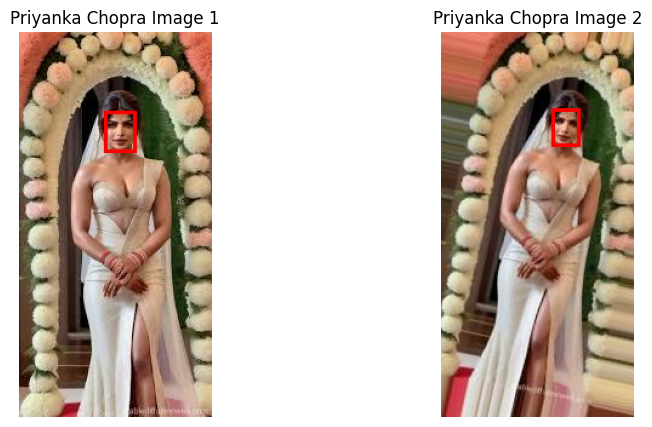

In [6]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image, ImageDraw
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

# Initialize MTCNN and InceptionResnetV1
mtcnn = MTCNN(keep_all=True)
model = InceptionResnetV1(pretrained='vggface2').eval()

# Function to detect faces and draw bounding boxes
def draw_face_markings(image_path):
    img = Image.open(image_path)
    boxes, _ = mtcnn.detect(img)  # Detect faces and get bounding boxes
    if boxes is not None:
        draw = ImageDraw.Draw(img)
        for box in boxes:
            draw.rectangle([box[0], box[1], box[2], box[3]], outline='red', width=3)  # Correctly specify the coordinates
    return img

# Function to generate facial encoding
def get_face_encoding(image_path):
    img = Image.open(image_path)
    img_cropped = mtcnn(img)  # Detect faces in the image
    if img_cropped is None or len(img_cropped) == 0:
        return None  # No face detected, return None
    img_embedding = model(img_cropped[0].unsqueeze(0))  # Extract the facial embedding for the first detected face
    return img_embedding.detach().numpy().flatten()  # Return as 1D array (512-dimensional)

# Example image paths
image_path_1 = "/workspace/DS4002Project3/DATA/celebrities_extra/Priyanka-Chopra/297.jpg"
image_path_2 = "/workspace/DS4002Project3/DATA/celebrities_extra/Priyanka-Chopra/298.jpg"

# Generate encodings
encoding_1 = get_face_encoding(image_path_1)
encoding_2 = get_face_encoding(image_path_2)

# Check if both encodings are available
if encoding_1 is not None and encoding_2 is not None:
    # Compute cosine similarity
    similarity = 1 - cosine(encoding_1, encoding_2)  # Cosine similarity
    print(f"Cosine Similarity: {similarity:.4f}")
else:
    print("One or both images do not contain a detectable face.")

# Draw and display the images with face markings
img1_with_boxes = draw_face_markings(image_path_1)
img2_with_boxes = draw_face_markings(image_path_2)

# Display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1_with_boxes)
axes[0].set_title("Priyanka Chopra Image 1")
axes[0].axis("off")

axes[1].imshow(img2_with_boxes)
axes[1].set_title("Priyanka Chopra Image 2")
axes[1].axis("off")

plt.show()


### The cosine similarity reported for the two images is 0.7408. The scale runs from -1 to 1, where a score of -1 indicates no similarity, a score of 0 indicates some similarity, and a score of 1 indicates perfect facial similarity (same facial image).

### Therefore, a score of 0.7408 indicates that the two images likely portray the same person in different angles/lightings. This is true, of course.